#### End 2 nd DataScience Project

### WOrkflow
+ Data Prep
+ EDA
+ KE
+ Recommendation System
+ ML Predictive Analysis
+ Productionized with Streamlit/Flask

#### EDA

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

py.init_notebook_mode(connected=True)
import plotly.express as px
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_palette('Dark2')
sns.set_style("darkgrid", rc=custom_style)

In [3]:
# Hide All Warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Load Dataset
df = pd.read_csv("Udemy_Courses.csv")

In [5]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


### Questions
+ Course Title
	- What is the most frequent words in course title
	- Longest/Shortest course title
	- How can we build recommendation systems via title using similarity
	- Most famous courses by number of subscribers

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

+ Published Year
	- Number of courses per year
	- Which year has the highest number of courses
	- What is the trend of courses per year

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

+ Duration of Course
	- Which courses have the highest duration (paid or not)
	- Which courses have higher duration
	- Duration vs number of subscribers

+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration



#### EDA on Subject/Category
+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

In [6]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [7]:
# How many subject/category are there in the dataset
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [8]:
# How many subject/category are there in the dataset
len(df['subject'].unique())

4

In [9]:
d = {'CourseCategory':df['subject'].value_counts().index, 'Number':df['subject'].value_counts()}
df_sub_count = pd.DataFrame(data = d, index = None)
df_sub_count = df_sub_count.reset_index().drop('index', 1)
df_sub_count

,CourseCategory,Number
0,Web Development,1200
1,Business Finance,1199
2,Musical Instruments,681
3,Graphic Design,603


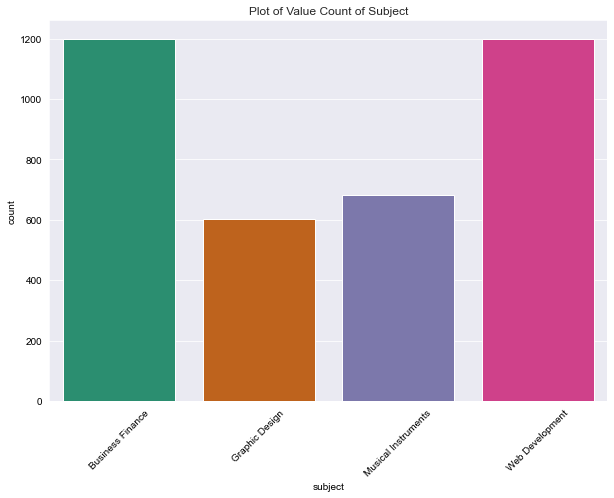

In [10]:
# Method 2: using seaborn

plt.figure(figsize=(10,7))
sns.countplot(df['subject'])
plt.title("Plot of Value Count of Subject")
plt.xticks(rotation=45)
plt.show()

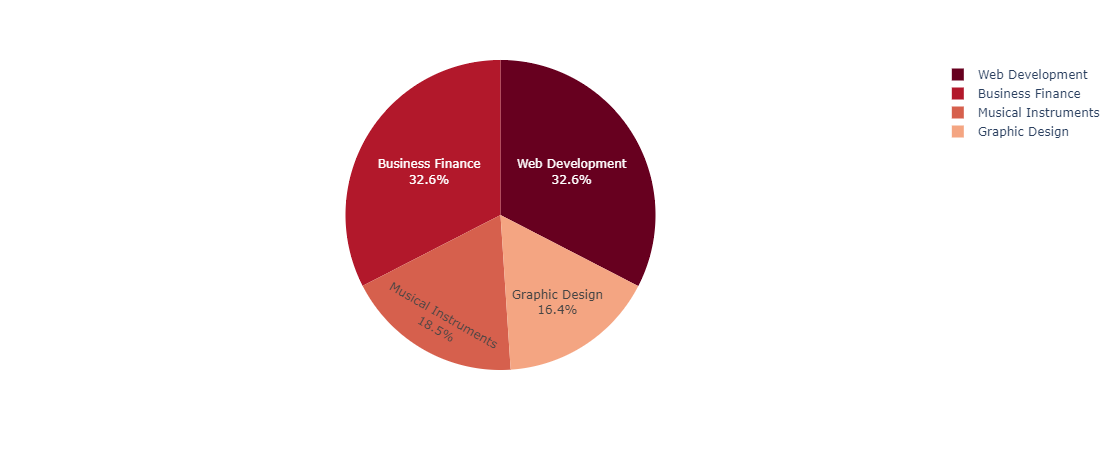

In [11]:
# Plot Distribution of Subject/Value Counts with Pie Chart
fig = px.pie(df_sub_count, values='Number', names='CourseCategory', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### EDA on Subscribers
+ Subscribers
    - Which course have the highest number of subscribers
    - Average number of subscribers
    - Number of subscribers per Subject
    - Number of subscribers per year

In [12]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [13]:
# Number of subscribers per Subject
d = {'CourseCategory':df.groupby('subject').sum().index, 'NumberOfSubscribers':df.groupby('subject').sum()['num_subscribers']}
df_subscribers = pd.DataFrame(data = d)
df_subscribers

,CourseCategory,NumberOfSubscribers
subject,,
Business Finance,Business Finance,1870747
Graphic Design,Graphic Design,1063148
Musical Instruments,Musical Instruments,846719
Web Development,Web Development,7980572


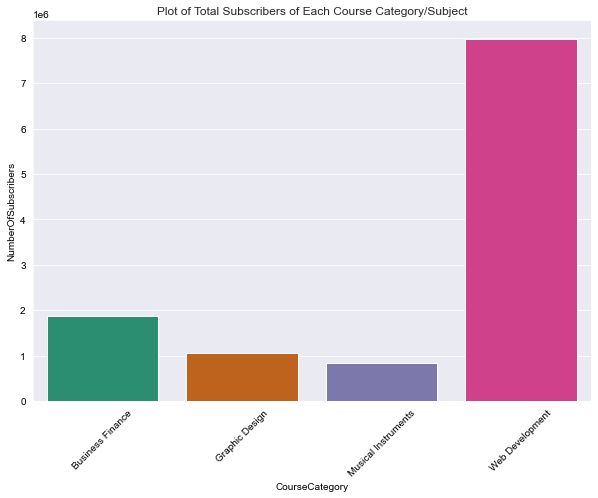

In [14]:
# Plot of the Number of subscribers per Subject
plt.figure(figsize=(10,7))
sns.barplot(x = 'CourseCategory', y = 'NumberOfSubscribers', data = df_subscribers)
plt.title("Plot of Total Subscribers of Each Course Category/Subject")
plt.xticks(rotation=45)
plt.show()

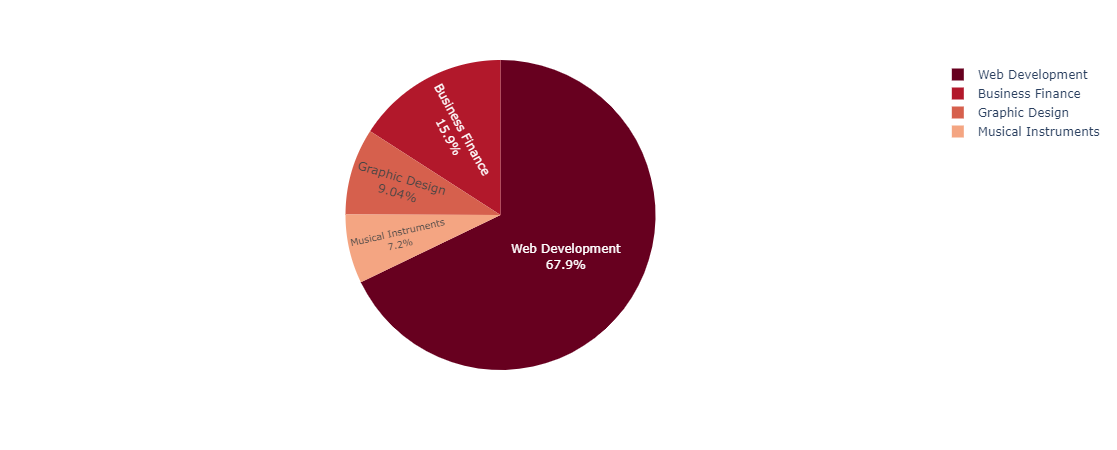

In [15]:
# Plot of the Number of subscribers per Subject
fig = px.pie(df_subscribers, values='NumberOfSubscribers', names='CourseCategory', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### Narrative
+ More subscribers for Web dev than Business Finance
+ The top subject category is Web Dev, Business Finance

In [16]:
# Total Number of Subscribers
df['num_subscribers'].sum()


11761186

In [17]:
##Average number of subscribers
df['num_subscribers'].mean()


3193.3711648112953

In [18]:
# Min number of subscriber
df['num_subscribers'].min()

0

In [19]:
# Max number of subscriber
df['num_subscribers'].max()

268923

In [20]:
# Which course has the highest number of sub
df['num_subscribers'].idxmax()

2832

In [21]:
# Get the location
df.iloc[2832]

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
Name: 2832, dtype: object

#### Narrative
+ Udemy has over 11 million subscribers
+ Highest num of sub: 268923
+ Average num of sub: 3193

#### EDA on Levels
Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

In [22]:
# How many levels do we have
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', '52'], dtype=object)

In [23]:
# What is the distribution of courses per levels
df['level'].value_counts()

All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
52                       1
Name: level, dtype: int64

In [24]:
d = {'Level':df['level'].value_counts().index, 'Number':df['level'].value_counts()}
df_levels = pd.DataFrame(data = d)
df_levels

,Level,Number
All Levels,All Levels,1932
Beginner Level,Beginner Level,1271
Intermediate Level,Intermediate Level,421
Expert Level,Expert Level,58
52,52,1


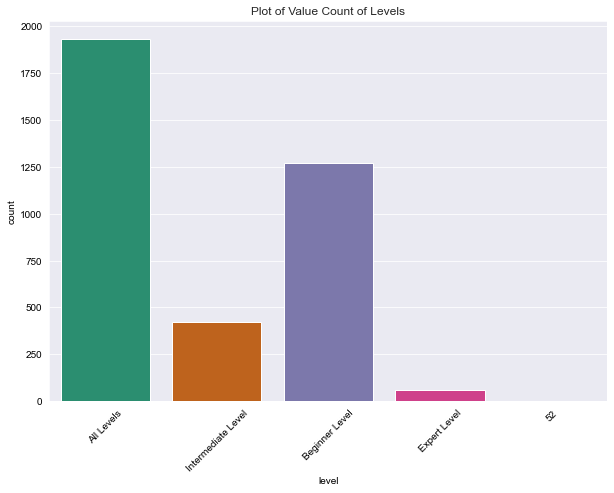

In [25]:
# What is the distribution of courses per levels
plt.figure(figsize=(10,7))
sns.countplot(df['level'])
plt.title("Plot of Value Count of Levels")
plt.xticks(rotation=45)
plt.show()

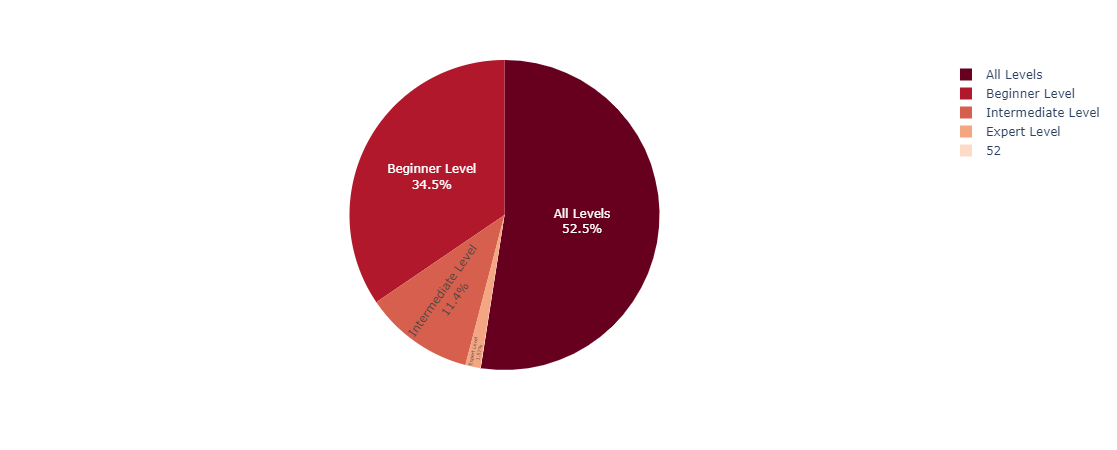

In [26]:
# What is the distribution of courses per levels
fig = px.pie(df_levels, values='Number', names='Level', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [27]:
#  How many subscribers per levels
d = {'Level':df.groupby('level').sum().index, 'NumberOfSubscribers':df.groupby('level').sum()['num_subscribers']}
df_sub_level = pd.DataFrame(data = d)
df_sub_level

,Level,NumberOfSubscribers
level,,
52,52,30
All Levels,All Levels,6916112
Beginner Level,Beginner Level,4052843
Expert Level,Expert Level,50196
Intermediate Level,Intermediate Level,742005


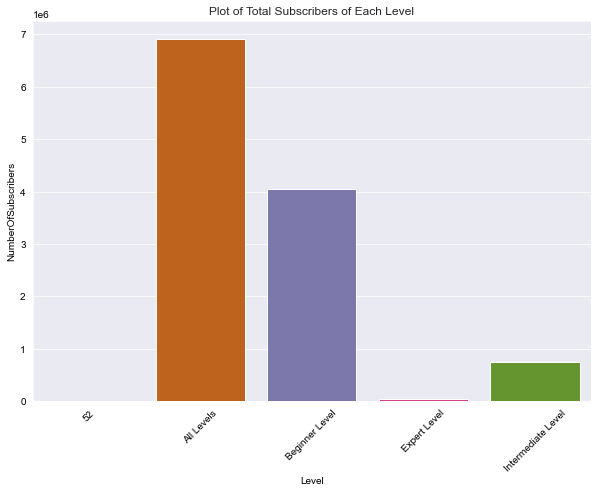

In [28]:
# Plot of How many subscribers per levels
plt.figure(figsize=(10,7))
sns.barplot(x = 'Level', y = 'NumberOfSubscribers', data = df_sub_level)
plt.title("Plot of Total Subscribers of Each Level")
plt.xticks(rotation=45)
plt.show()

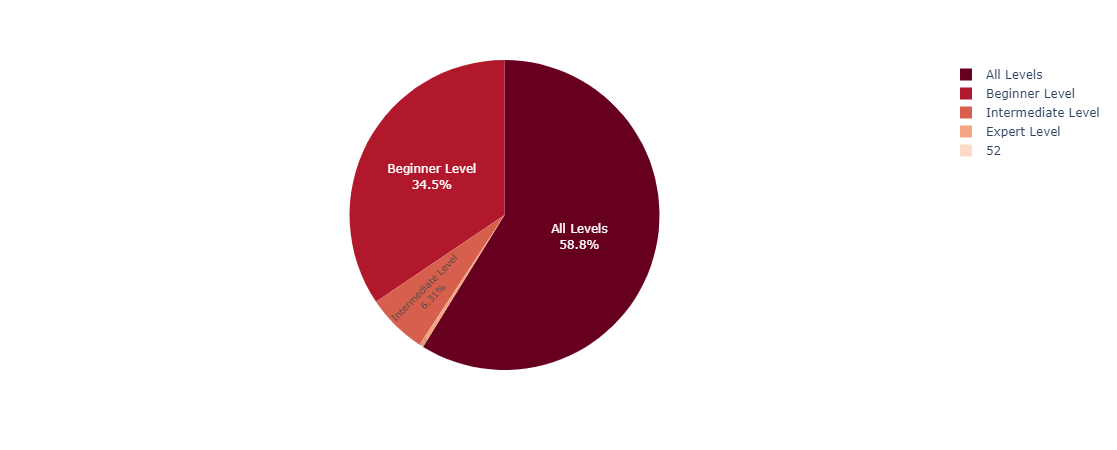

In [29]:
#  How many subscribers per levels
fig = px.pie(df_sub_level, values='NumberOfSubscribers', names='Level', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [30]:
# How many levels per subject category
df.groupby('subject')['level'].value_counts()

subject              level             
Business Finance     All Levels            699
                     Beginner Level        341
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
                     52                      1
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: level, dtype: int64

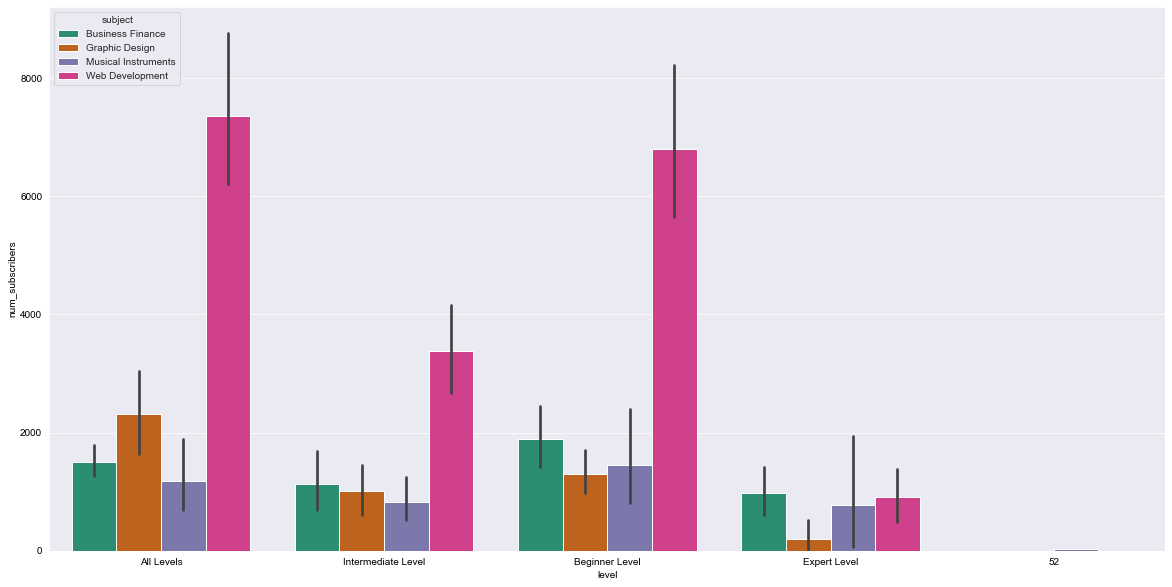

In [31]:
# Using Seaborn 
plt.figure(figsize=(20,10))
sns.barplot(x='level',y='num_subscribers', hue='subject',data=df)
plt.show()

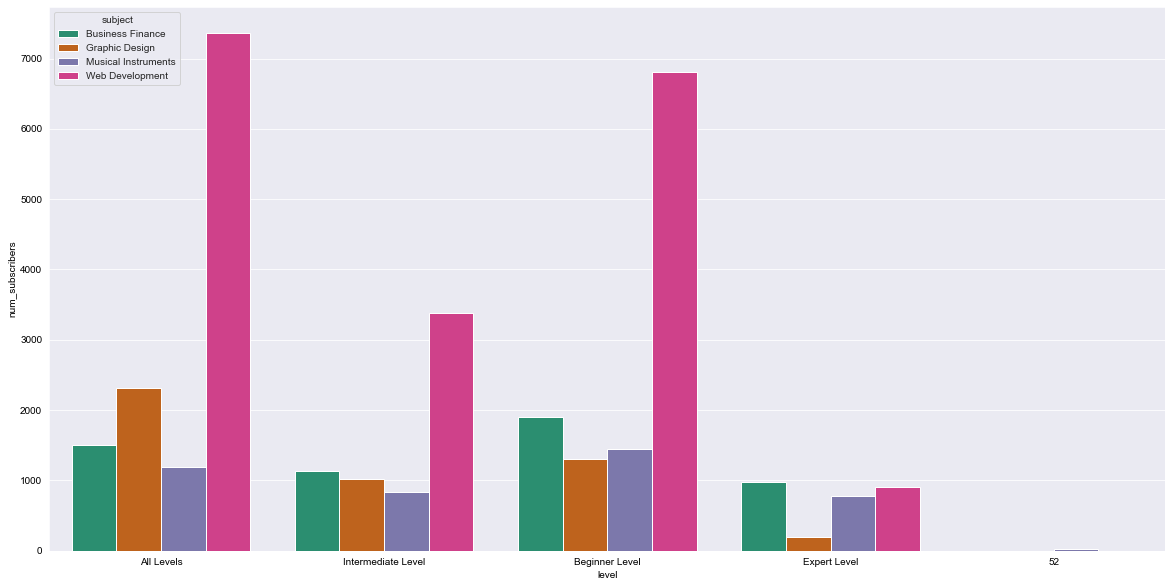

In [32]:
# Using Seaborn 
plt.figure(figsize=(20,10))
sns.barplot(x='level',y='num_subscribers', hue='subject',data=df,ci=None)
plt.show()

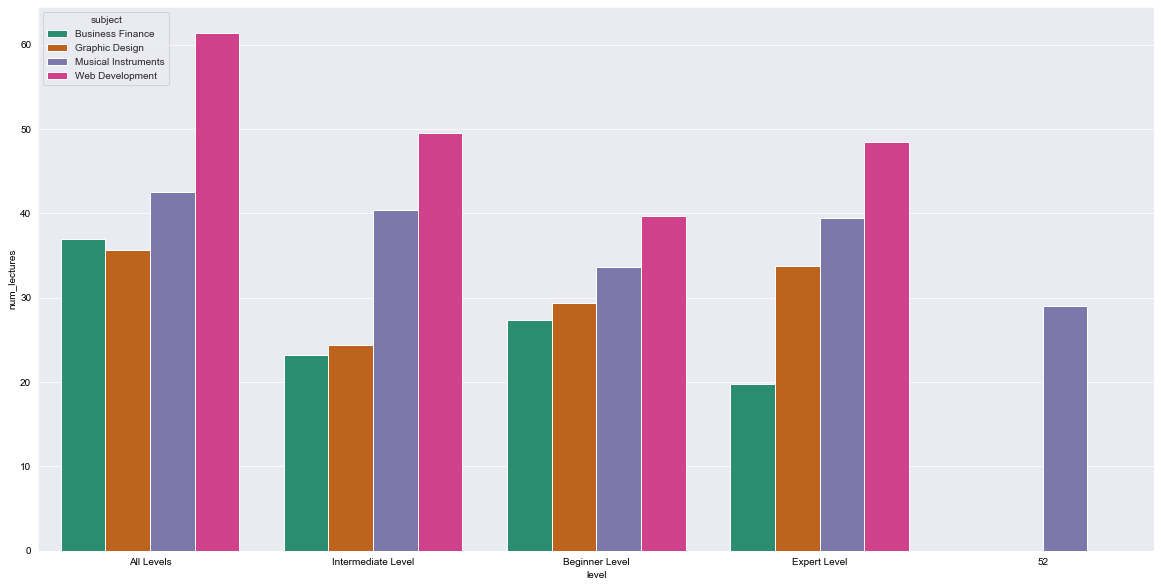

In [33]:
# Using Seaborn 
plt.figure(figsize=(20,10))
sns.barplot(x='level',y='num_lectures', hue='subject',data=df,ci=None)
plt.show()

In [34]:
# EDA on Lectures
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [35]:
def plot_num_of_countable_feature(feature):
    
    # Using Seaborn 
    plt.figure(figsize=(10,7))
    plt.title("Plot of {} per level per subject".format(feature))
    sns.barplot(x='level',y=feature, hue='subject',data=df,ci=None)
    plt.show()
  
    d = {'Level':df.groupby('level')[feature].sum().index, 'NumberOf {}'.format(feature):df.groupby('level')[feature].sum()}
    df_feature = pd.DataFrame(data = d)
    fig = px.pie(df_feature, values='NumberOf {}'.format(feature), names='Level', color_discrete_sequence=px.colors.sequential.RdBu)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

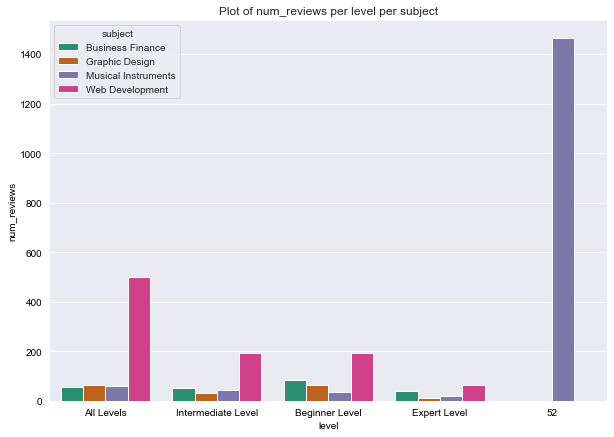

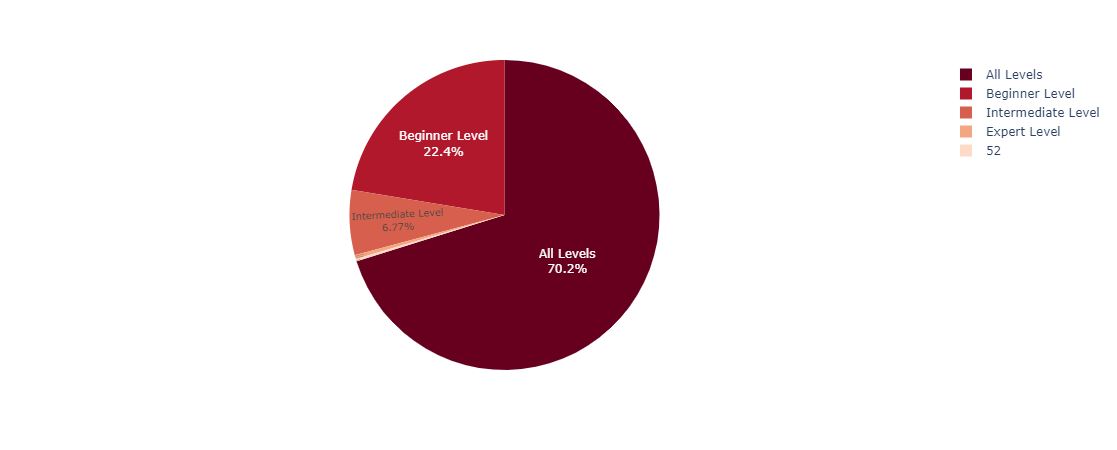

In [36]:
# Plot For the lectures * reviews
plot_num_of_countable_feature('num_reviews')

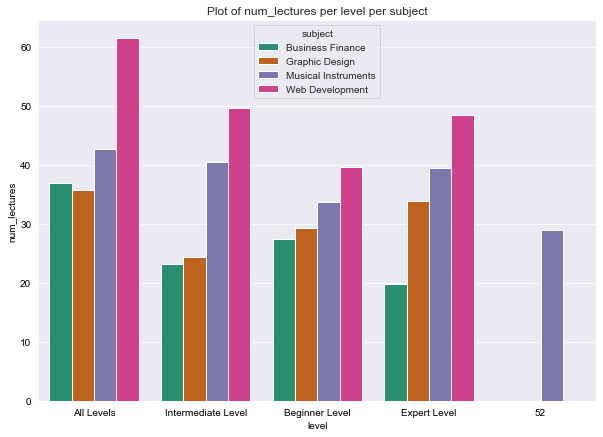

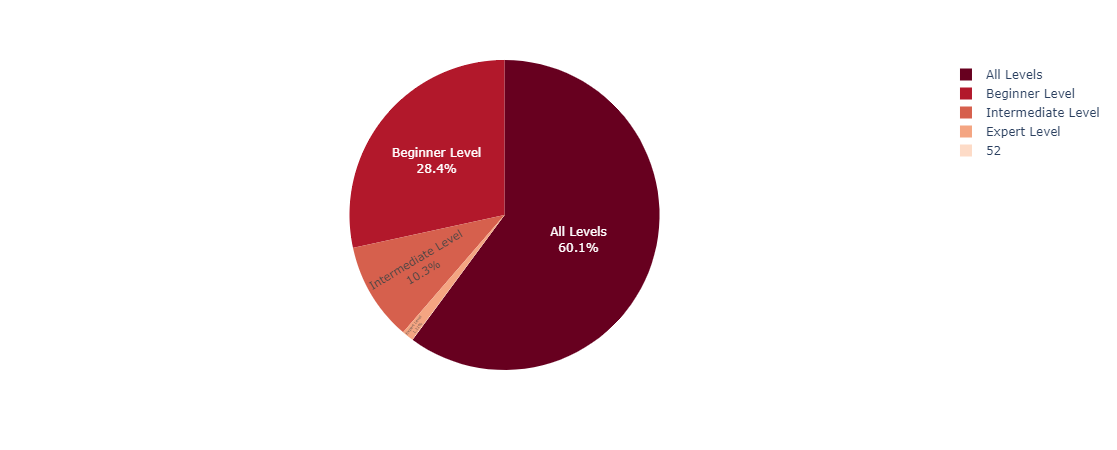

In [37]:
# Plot of lectures
plot_num_of_countable_feature('num_lectures')

### EDA on Price
+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses


In [38]:
# Datatype
df['price'].dtype

dtype('O')

In [39]:
# unique price
df.price.unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135', 'TRUE'],
      dtype=object)

In [40]:
df['price'] = df['price'].str.replace('Free|TRUE','0')

In [41]:
df['price'] = df['price'].astype(float)

In [42]:
# What is the average price
df['price'].mean()

65.99239750203638

In [43]:
# What is the max price
df['price'].max()

200.0

In [44]:
# What is the max price location
df['price'].idxmax()

0

In [45]:
df.iloc[0]

course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                                200
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                               1.5 hours
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
Name: 0, dtype: object

In [46]:
# What is the most profitable course
# price x num_subscriber
df['profit'] = df['price'] * df['num_subscribers']

In [47]:
# What is the most profitable
df['profit'].max()

24316800.0

#### Narative
+ Most profitable course made 24 million $

In [48]:
# The location of course
df['profit'].idxmax()

3235

In [49]:
df.iloc[3235]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                                200
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                       2.43168e+07
Name: 3235, dtype: object

In [50]:
### How Many Courses on Udemy Are paid or free
df['is_paid'].unique()

array(['True', 'False', 'FALSE', 'TRUE',
       'https://www.udemy.com/learnguitartoworship/'], dtype=object)

In [51]:
def func(df):
    
    if df['is_paid'] == 'True' or df['is_paid'] == 'TRUE' :
        return True
    if df['is_paid'] == 'False' or df['is_paid'] == 'FALSE' :
        return False
    
df['is_paid'] = df.apply(func, axis = 1)

In [52]:
### How Many Courses on Udemy Are paid or free
df['is_paid'].value_counts()

True     3372
False     310
Name: is_paid, dtype: int64

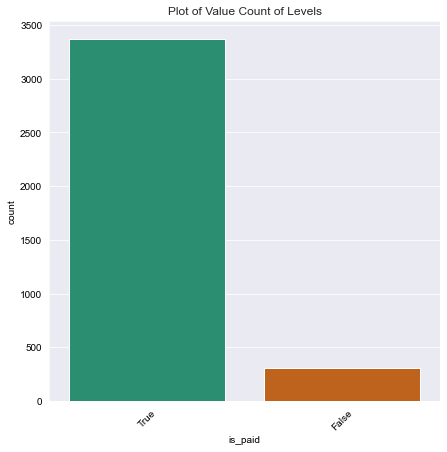

In [53]:
plt.figure(figsize=(7,7))
sns.countplot(df['is_paid'])
plt.title("Plot of Value Count of Levels")
plt.xticks(rotation=45)
plt.show()

In [54]:
# How many paid/free course in each subject category
df.groupby('is_paid')['subject'].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1103
         Web Development        1067
         Musical Instruments     634
         Graphic Design          568
Name: subject, dtype: int64

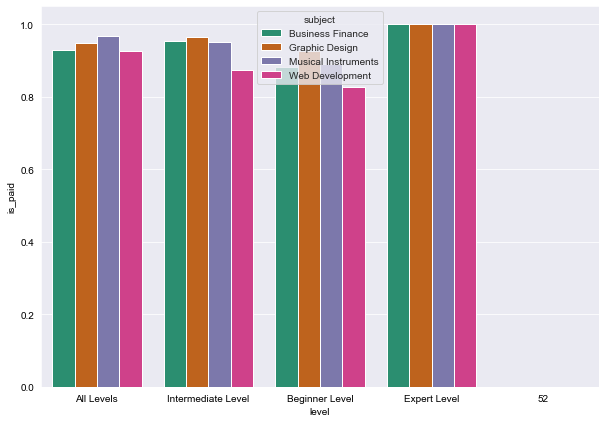

In [55]:
plt.figure(figsize=(10,7))
sns.barplot(x='level',y='is_paid', hue='subject',data=df,ci=None)
plt.show()


### Correlation Question
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

<AxesSubplot:xlabel='price', ylabel='num_subscribers'>

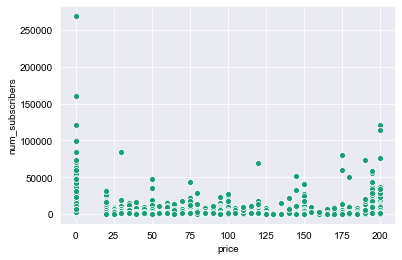

In [56]:
sns.scatterplot(data=df,x='price',y='num_subscribers')

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

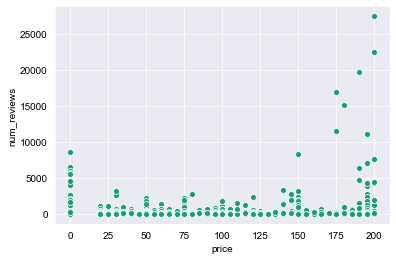

In [57]:
sns.scatterplot(data=df,x='price',y='num_reviews')

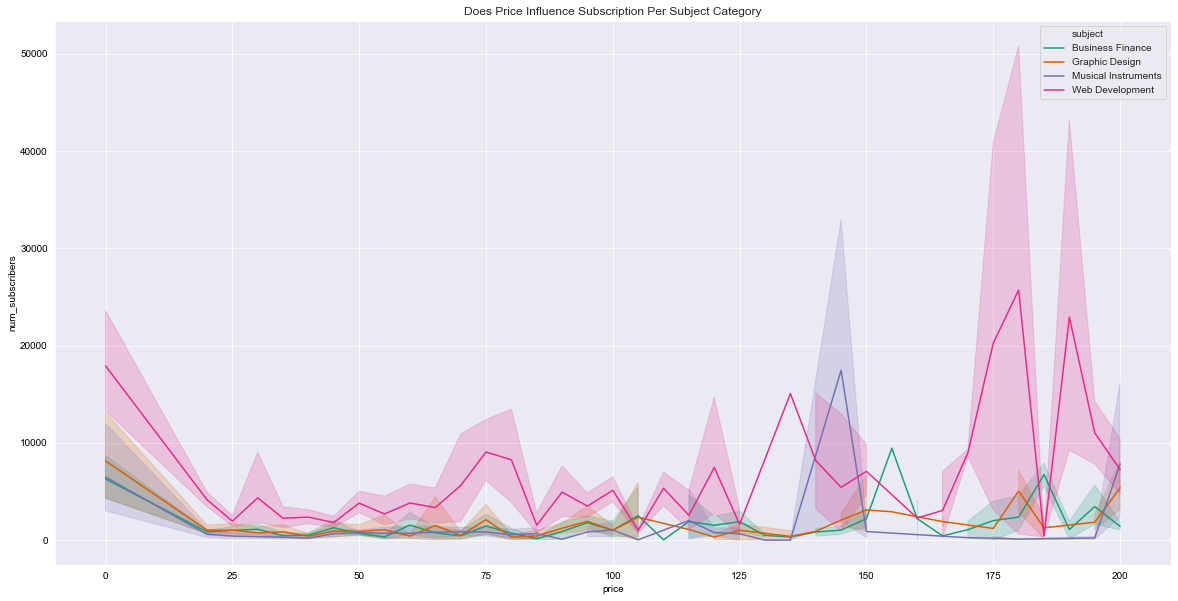

In [58]:
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='price',y='num_subscribers',hue='subject')
plt.show()

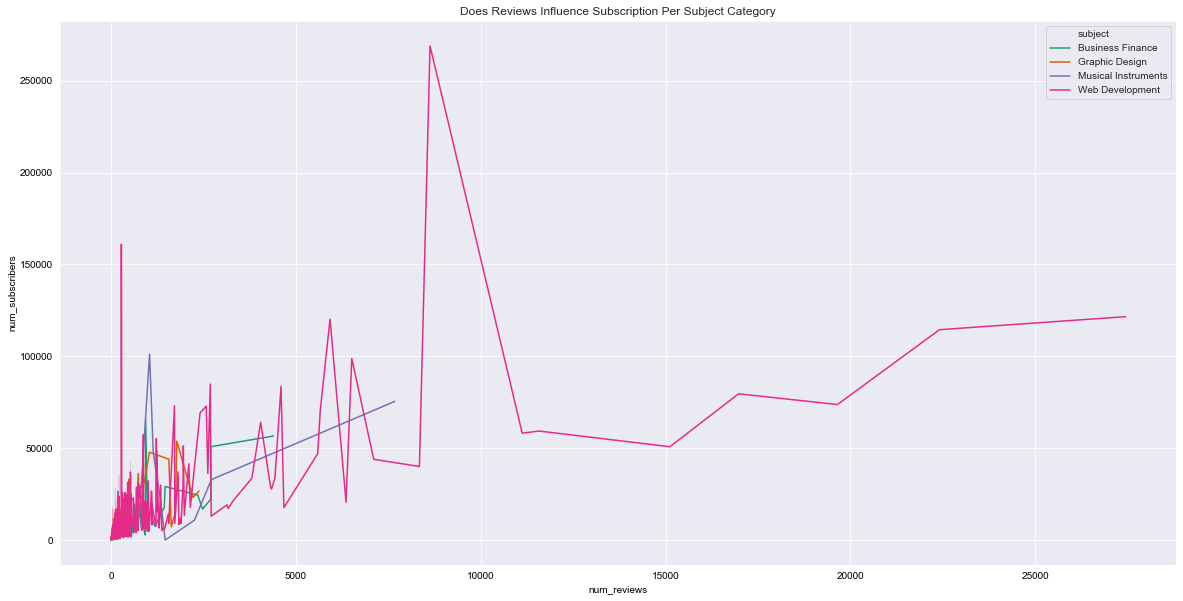

In [59]:
plt.figure(figsize=(20,10))
plt.title("Does Reviews Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='num_reviews',y='num_subscribers',hue='subject')
plt.show()

### Question on Time
+ Published Year
	- Number of courses per year
	- Distribution of subjects per year
	- Which year has the highest number of courses
	- What is the trend of courses per year

In [84]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [85]:
df['published_timestamp'].dtype

dtype('O')

In [86]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [87]:
df['published_timestamp'].str.split('T')

0       [2017-01-18, 20:58:58Z]
1       [2017-03-09, 16:34:20Z]
2       [2016-12-19, 19:26:30Z]
3       [2017-05-30, 20:07:24Z]
4       [2016-12-13, 14:57:18Z]
                 ...           
3678    [2016-06-14, 17:36:46Z]
3679    [2017-03-10, 22:24:30Z]
3680    [2015-12-30, 16:41:42Z]
3681    [2016-08-11, 19:06:15Z]
3682    [2014-09-28, 19:51:11Z]
Name: published_timestamp, Length: 3683, dtype: object

In [88]:
df['published_date'] = df['published_timestamp'].str.split('T').str[0]

In [89]:
df['published_date']

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3678    2016-06-14
3679    2017-03-10
3680    2015-12-30
3681    2016-08-11
3682    2014-09-28
Name: published_date, Length: 3683, dtype: object

In [90]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,2017-01-18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,2017-03-09
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,2016-12-19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,2017-05-30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,2016-12-13


In [94]:
df = df.replace('3 hours', '2017-01-18')

In [95]:
df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")

In [96]:
df.dtypes

course_id                       int64
course_title                   object
url                            object
is_paid                        object
price                          object
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration               object
published_timestamp            object
subject                        object
published_date         datetime64[ns]
dtype: object

In [97]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day

In [98]:
df.groupby('year')['num_subscribers'].value_counts()

year  num_subscribers
2011  3697               1
      7014               1
      12458              1
      26673              1
      69186              1
                        ..
2017  15276              1
      16158              1
      16829              1
      17784              1
      26742              1
Name: num_subscribers, Length: 2894, dtype: int64

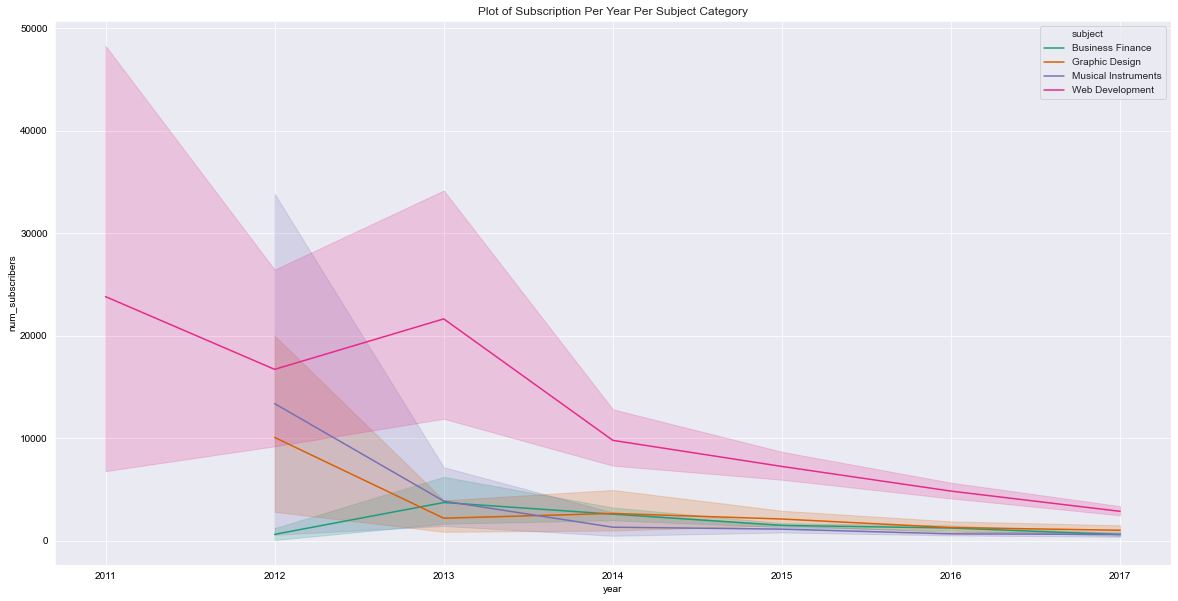

In [99]:
plt.figure(figsize=(20,10))
plt.title("Plot of Subscription Per Year Per Subject Category")
sns.lineplot(data=df,x='year',y='num_subscribers',hue='subject')
plt.show()

#### Questions on Course Title
+ Course Title
	- What is the most frequent words in course title
	- Longest/Shortest course title
	- How can we build recommendation systems via title using similarity
	- Most famous courses by number of subscribers

In [100]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,2017-01-18,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,2017-03-09,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,2016-12-19,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,2017-01-18,2017-05-30T20:07:24Z,Business Finance,2017-05-30,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,2016-12-13,2016,12,13


In [101]:
# Get the Longest Title for a course
df['course_title'].str.len()

0       34
1       59
2       56
3       50
4       44
        ..
3678    56
3679    55
3680    29
3681    54
3682    52
Name: course_title, Length: 3683, dtype: int64

In [102]:
# Get the Longest Title for a course
df['course_title_len'] = df['course_title'].str.len()

In [103]:
# Get Longest title
df['course_title_len'].max()

244

In [104]:
# Get tlocation
df.iloc[243]

course_id                                                    480752
course_title               Investing In Stocks With 10 Simple Rules
url                    https://www.udemy.com/value-investing-rules/
is_paid                                                        True
price                                                            95
num_subscribers                                                 871
num_reviews                                                      79
num_lectures                                                     59
level                                                    All Levels
content_duration                                            2 hours
published_timestamp                            2015-06-16T21:35:07Z
subject                                            Business Finance
published_date                                  2015-06-16 00:00:00
year                                                           2015
month                                           

### Keyword Extraction
+ Rake
+ Yakes
+ Collection


In [105]:
df['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3678    Learn jQuery from Scratch - Master of JavaScri...
3679    How To Design A WordPress Website With No Codi...
3680                        Learn and Build using Polymer
3681    CSS Animations: Create Amazing Effects on Your...
3682    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3683, dtype: object

In [106]:
# Text Cleaning to remove stopwords
import neattext.functions as nfx

In [108]:
df['clean_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [109]:
df[['clean_title','course_title']]

,clean_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3678,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3679,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3680,Learn Build Polymer,Learn and Build using Polymer
3681,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [110]:
df['clean_title'] = df['clean_title'].apply(nfx.remove_special_characters)

In [111]:
df['clean_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course  Certification  Grow Practice
2        Financial Modeling Business Analysts Consultants
3             Beginner Pro  Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3678      Learn jQuery Scratch  Master JavaScript library
3679                      Design WordPress Website Coding
3680                                  Learn Build Polymer
3681        CSS Animations Create Amazing Effects Website
3682              MODX CMS Build Websites Beginners Guide
Name: clean_title, Length: 3683, dtype: object

In [112]:
# Tokenization
all_title_list = df['clean_title'].to_list()

In [113]:
# Convert list to tokens
all_tokens = [i for line in all_title_list for i in line.split()]

In [114]:
from collections import Counter

In [115]:
word_freq = Counter(all_tokens)

In [116]:
top_words = dict(word_freq.most_common(50))

In [117]:
name = []
count = []
for i in top_words:
    name.append(i)
    count.append(top_words[i])

In [118]:
df_count = pd.DataFrame()
df_count['Name'] = name
df_count['Count'] = count

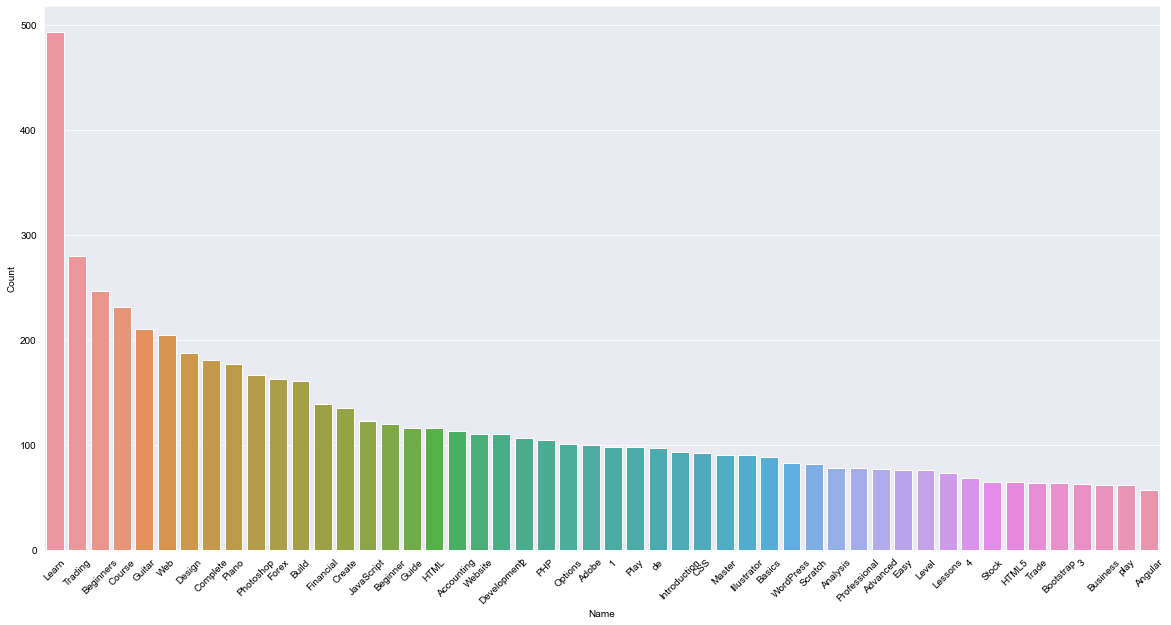

In [119]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Name', y = 'Count', data = df_count)
plt.xticks(rotation=45)
plt.show()

In [165]:
from rake_nltk import Rake

In [167]:
r = Rake()

In [169]:
join_words = ' '.join(all_tokens)

In [170]:
r.extract_keywords_from_text(join_words)

In [171]:
print(r.get_ranked_phrases_with_scores())

[(1932321.6067719297, 'angular 2 angular 4 complete aspnet mvc 5 course graphql react complete developers guide create simple photo gallery dropzonejs slick php wordpress hour createmanage website twitter bootstrap 2 beginners bootstrap tutorial essentials basic advanced create engaging website twitter bootstrap 2x javascript basics beginners css tutorial beginners style wordpress templates html5 css3 build modern responsive websites psd html5css3 twitter bootstrap 3 web development website sell thousands wordpress basics business share sell expertise php zend framework 2creating crud application javascript fundamentals building website jekyll big data apache hadoop developers fundamentals wordpress development create custom wordpress website wordpress website 2017 restful services aspnet web api web hosting fundamentals learning path react stunning react websites administering microsoft sql server 2012 databases 70462 php codeignitercrud concepts mvc adobe experience manager cms basic

In [172]:
### Thanks For Watching
### Jesus Saves @JCharisTech
#### By Jesse. E.Agbe(JCharis)